# Handwritten Digits Image Processing Dataset

### Bussiness case:


#### To create the model Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.


## import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
import os


## Loading the data

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Visualize the First 36 Training Images

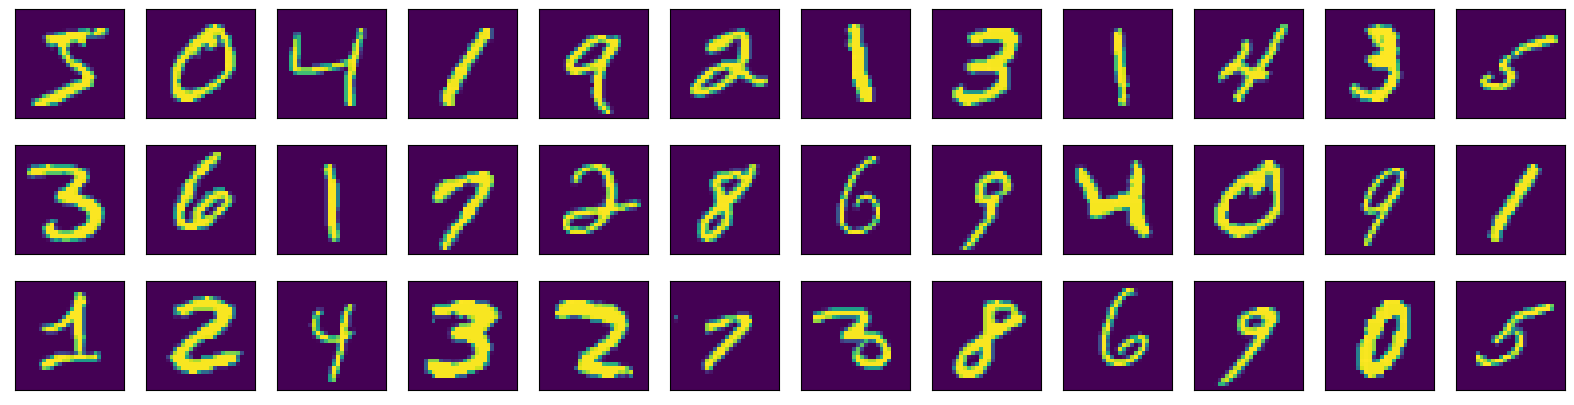

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])#no of rows column 
    ax.imshow(np.squeeze(x_train[i]))

## Preprocessing of the image

In [6]:
#preprocessing of the image that is scaling ,here scaling is mandotory
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Break Dataset into Training, Testing, and Validation Sets

In [7]:
from keras.utils import np_utils
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (55000, 28, 28)
55000 train samples
10000 test samples
5000 validation samples


## Define the Model Architecture


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=2, padding='same', activation='relu', 
                        input_shape=( 28, 28, 1 )))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(300, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

## Compile the Model

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Train the Model

In [11]:
from keras.callbacks import ModelCheckpoint   

# Train Model:
Mosel= model.fit(x_train, y_train, validation_data=(x_valid, y_valid),verbose=1, epochs=50, batch_size=36,
                 shuffle=True)



Epoch 1/50
1528/1528 [==============================] - 52s 34ms/step - loss: 0.4640 - accuracy: 0.9190 - val_loss: 0.1678 - val_accuracy: 0.9738
Epoch 2/50
1528/1528 [==============================] - 56s 36ms/step - loss: 0.4508 - accuracy: 0.9188 - val_loss: 0.1551 - val_accuracy: 0.9694
Epoch 3/50
1528/1528 [==============================] - 62s 40ms/step - loss: 0.4402 - accuracy: 0.9190 - val_loss: 0.2840 - val_accuracy: 0.9280
Epoch 4/50
1528/1528 [==============================] - 60s 39ms/step - loss: 0.4572 - accuracy: 0.9165 - val_loss: 0.1521 - val_accuracy: 0.9658
Epoch 5/50
1528/1528 [==============================] - 56s 36ms/step - loss: 0.4755 - accuracy: 0.9129 - val_loss: 0.2026 - val_accuracy: 0.9602
Epoch 6/50
1528/1528 [==============================] - 53s 35ms/step - loss: 0.4756 - accuracy: 0.9119 - val_loss: 0.1636 - val_accuracy: 0.9780
Epoch 7/50
1528/1528 [==============================] - 49s 32ms/step - loss: 0.4832 - accuracy: 0.9081 - val_loss: 0.2451 -

## Visualize Some Predictions

In [12]:
# get predictions on the test set
Prediction = model.predict(x_test)

# define integer labels (source: https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.html)
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


313/313 [==============================] - 13s 18ms/step


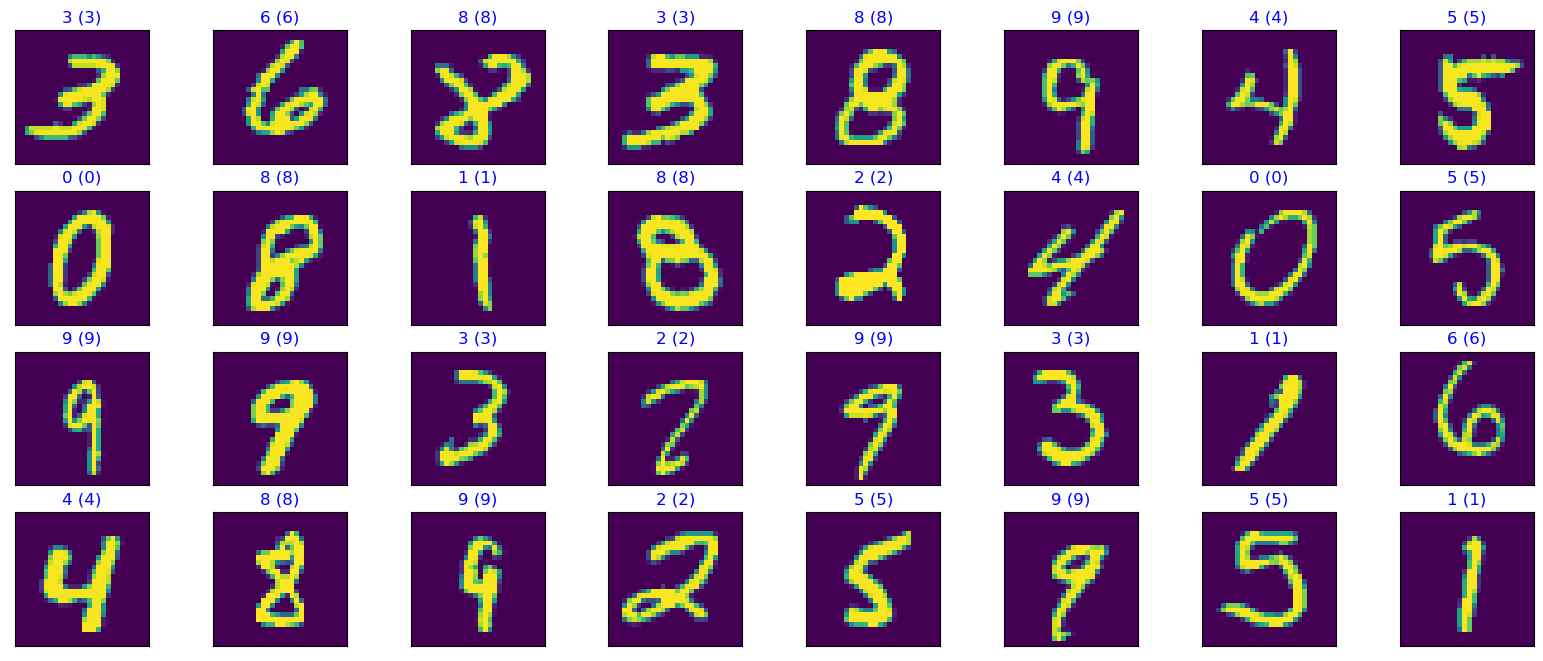

In [18]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(Prediction[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(mnist_labels[pred_idx], mnist_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))


In [19]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
loss = 100*score[0]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('Test loss :%.4f%% ' %loss)

Test accuracy: 93.6800%
Test loss :30.3230% 


## Model accuracy is 93% which is pretty good score.

## Loss is 30%


#### The evaluation metric is the categorization accuracy, or the proportion of test images that are correctly classified